In [30]:
# Generate the parameters
import numpy as np
import matplotlib.pyplot as plt

d = 250
max_iter = 2500

M = np.zeros((d, d))
for i in range(1, d - 1):
    M[i, i - 1] = -1
    M[i, i] = 2
    M[i, i + 1] = -1
M[0, 0] = 2
M[0, 1] = -1
M[d - 1, d - 2] = -1
M[d - 1, d - 1] = 2

b = np.zeros(d)
b[0] = 1


def f(x):
    return 0.5 * np.dot(x, M@ x) - np.dot(b, x)

def grad_f(x):
    return M @ x - b

# Mx* - b = 0
x_star = np.linalg.solve(M,b)
f_star = f(x_star)


In [31]:
# TODO: Implement the algorithms below.
def GD_constant(x0, L=4):
    x = x0
    loss = []
    for i in range(max_iter):
        x -= 1/L * grad_f(x)
        loss.append(f(x) - f_star)
    return loss

# Want to minimize f(x_k - alpha grad f(x_k))
# Pick alpha = grad * grad / grad * M * grad
# f (x_k - grad * grad / )
def GD_exact(x0):
    x = x0
    loss = []
    for i in range(max_iter):
        grad = grad_f(x)
        alpha = grad.dot(grad) / grad.dot(M).dot(grad)
        x -= alpha * grad
        loss.append(f(x) - f_star)
    return loss


def LSD(x0, L=4):
    x = x0
    loss = []
    alpha = 1 / L
    for i in range(max_iter):
        grad = grad_f(x)
        x -= alpha * grad
        alpha = grad.dot(grad) / grad.dot(M).dot(grad)
        loss.append(f(x) - f_star)
    return loss


def AGD(x0, L=4):
    x = x0
    y = x0
    loss = []
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = y - (1 / L) * grad
        y = x_new + (i / (i + 3)) * (x_new - x)
        x = x_new
        loss.append(f(x) - f_star)
    return loss

In [32]:
x0 = np.zeros(d)

loss_GD_constant = GD_constant(x0)
loss_GD_exact = GD_exact(x0)
loss_LSD = LSD(x0)
loss_AGD = AGD(x0)


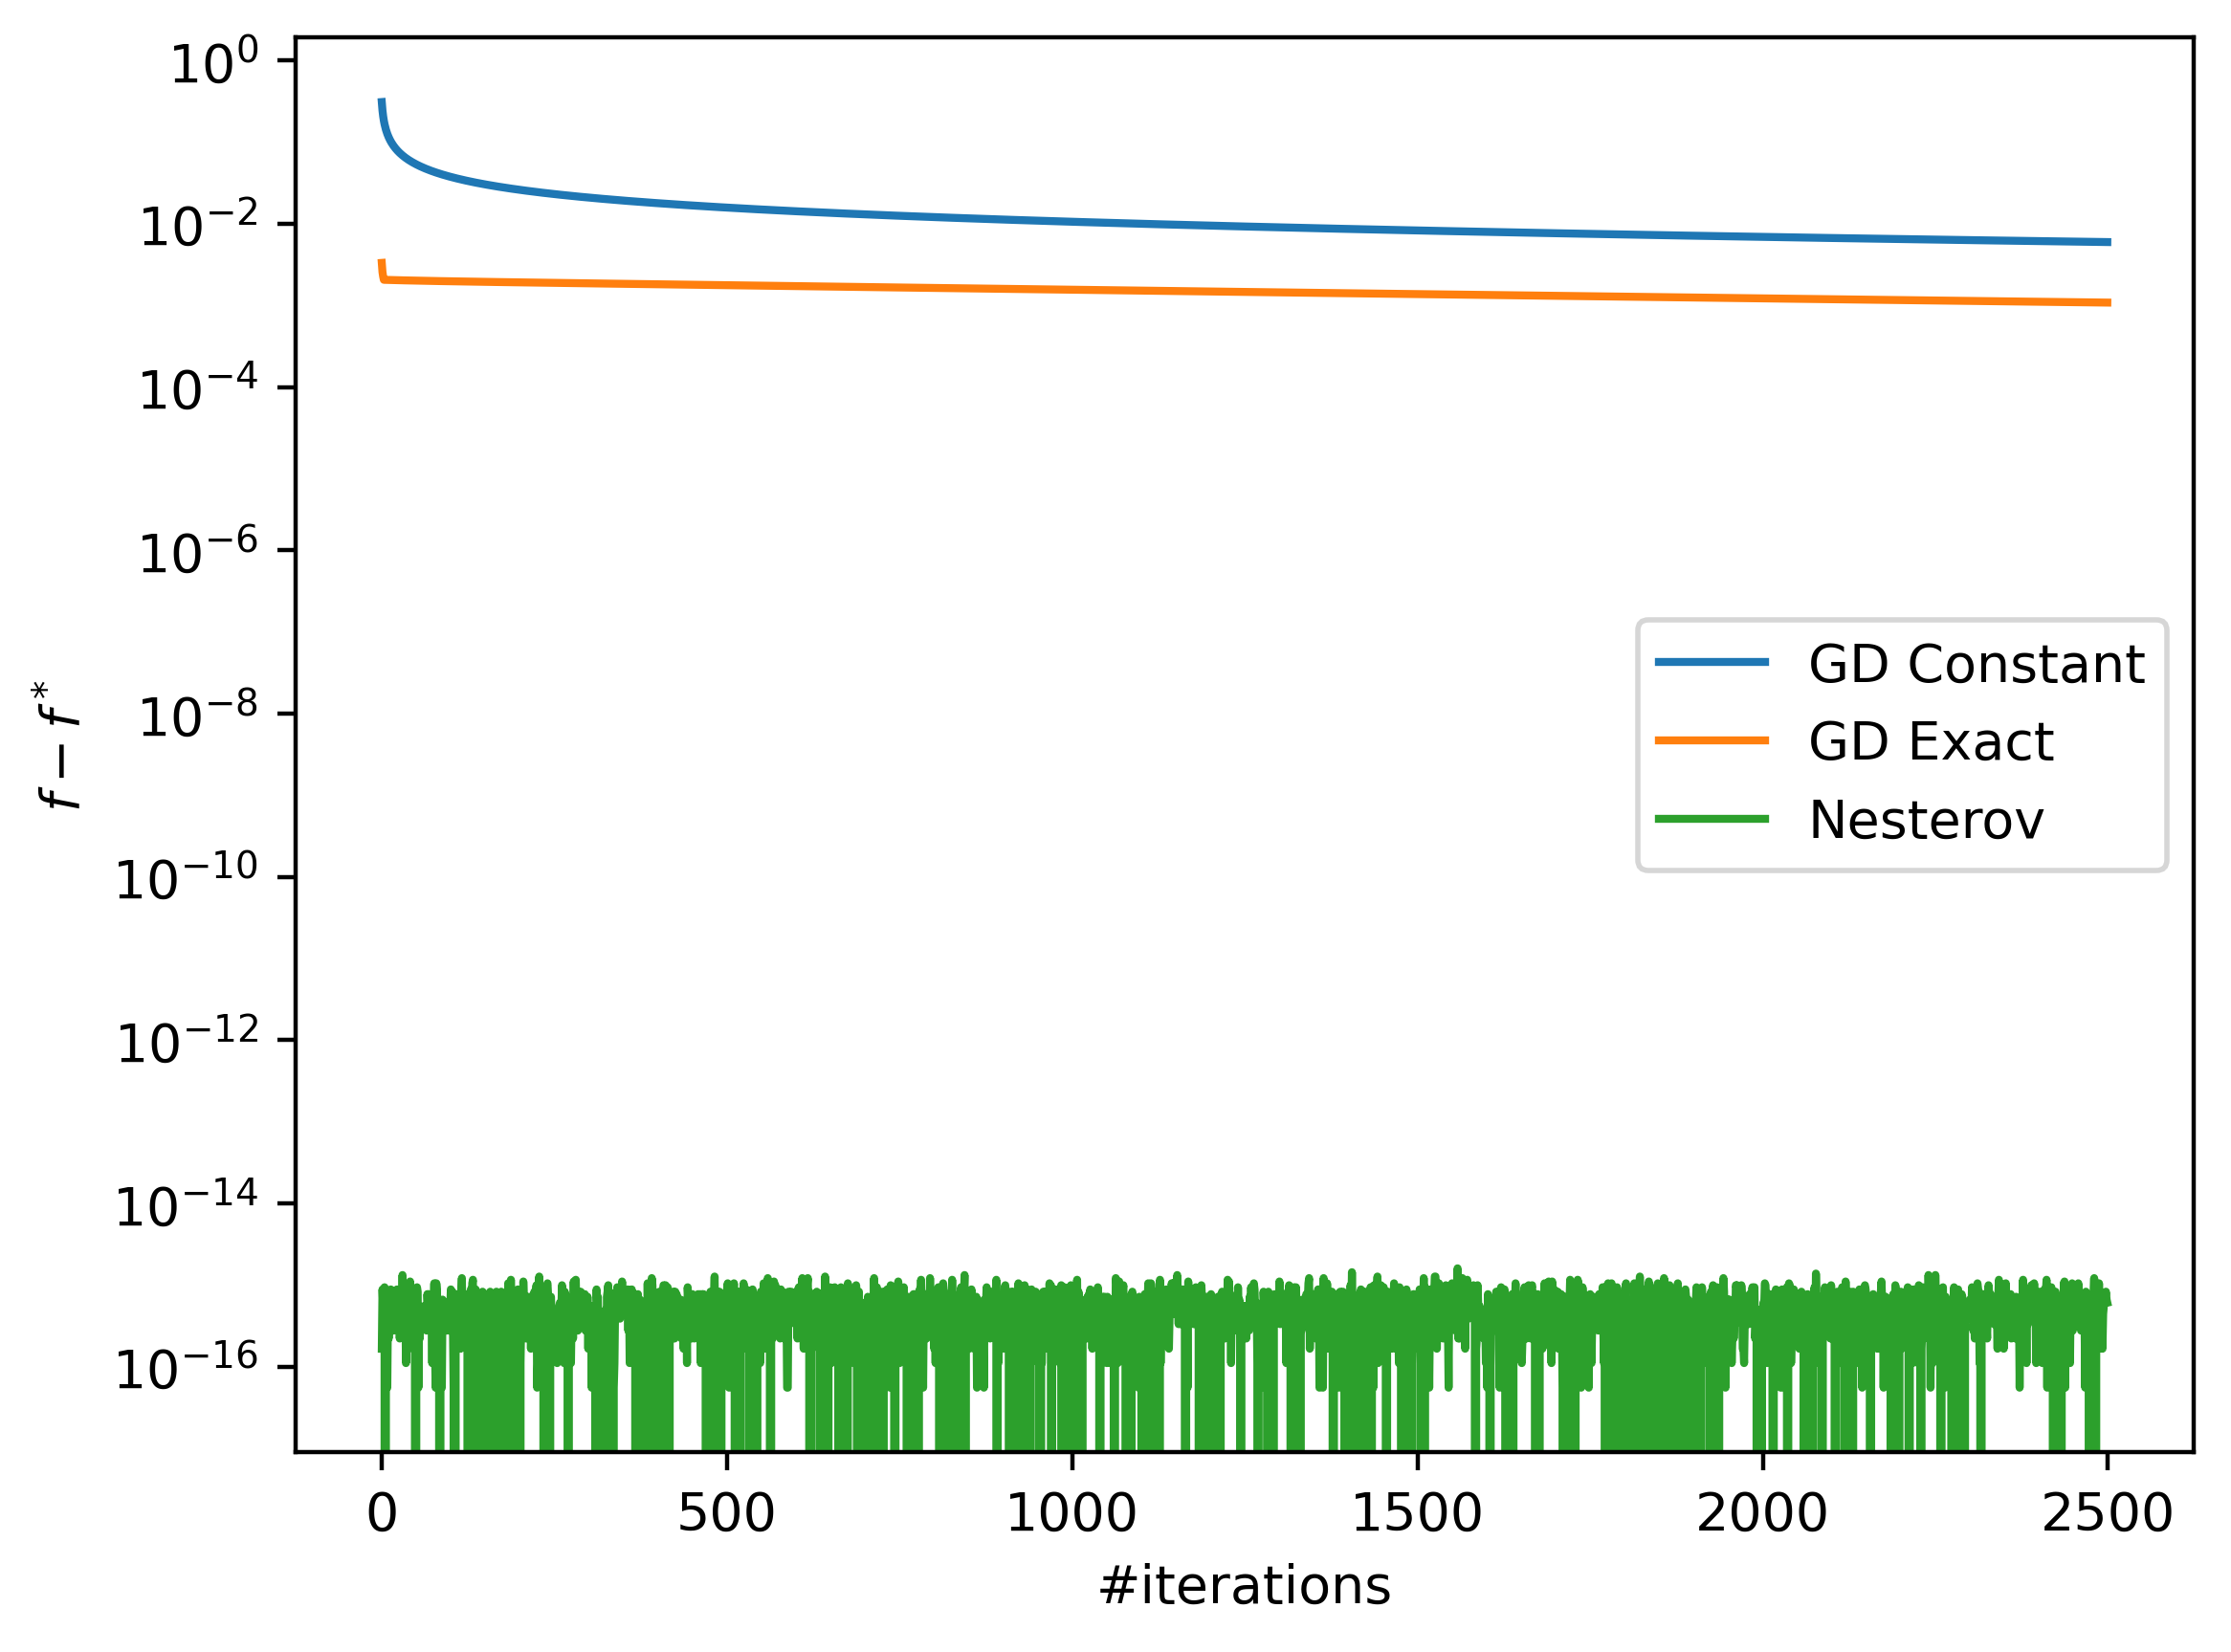

In [33]:
# Plotting code for the first question
fig, ax1 = plt.subplots()
fig.set_dpi(400)
ax1.set_yscale('log')
ax1.plot(loss_GD_constant, label='GD Constant')
ax1.plot(loss_GD_exact, label='GD Exact')
ax1.plot(loss_AGD, label='Nesterov')
ax1.set_xlabel('#iterations')
ax1.set_ylabel(r'$f-f^*$')
ax1.legend()
plt.savefig('figs/Q1.png')

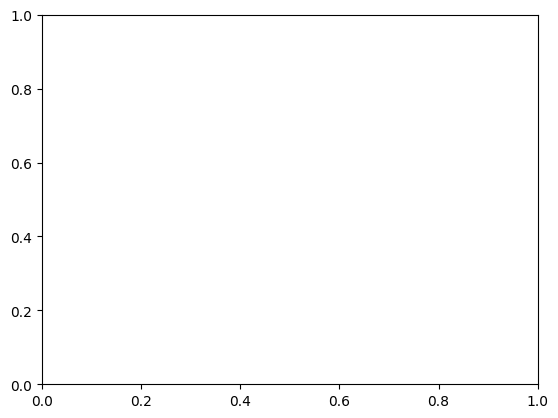

In [34]:
fig, ax2 = plt.subplots()
# TODO: plot the 2nd question

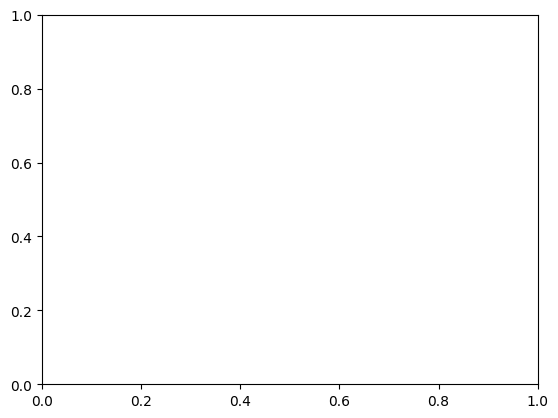

In [35]:
fig, ax3 = plt.subplots()
# TODO: plot the 3rd question